# Aprendiendo Pandas 2

In [1]:
from pandas import DataFrame, Series
import pandas as pd
import numpy as np
from numpy.random import randn

In [2]:
df = DataFrame([[1.4, np.nan], [7.1, -4.5], [np.nan, np.nan], [0.75, -1.3]],
               index=['a', 'b', 'c', 'd'], columns=['one', 'two'])
df

one  two
a  1.40  NaN
b  7.10 -4.5
c   NaN  NaN
d  0.75 -1.3

In [3]:
df.sum()

one    9.25
two   -5.80
dtype: float64

In [4]:
df.sum(axis=1)

a    1.40
b    2.60
c     NaN
d   -0.55
dtype: float64

In [5]:
# Los NaN en general se excluyen, salvo que todos los valores a operar sean NaN
#  Se puede pedir que no se excluyan, con lo que operaciones con NaN devolverán NaN
df.mean(axis=1, skipna=False)

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

In [6]:
# idxmin, idxmax devuelven los índices donde se alcanza el mínimo y el máximo resp.
df.idxmax()

one    b
two    d
dtype: object

In [7]:
# también hay acumuladores de operaciones
df.cumsum()

one  two
a  1.40  NaN
b  8.50 -4.5
c   NaN  NaN
d  9.25 -5.8

In [8]:
# describe muestra varios datos estadísticos en un sólo paso
df.describe()

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/numpy-1.11.1rc1-py3.4-macosx-10.6-intel.egg/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


one       two
count  3.000000  2.000000
mean   3.083333 -2.900000
std    3.493685  2.262742
min    0.750000 -4.500000
25%         NaN       NaN
50%         NaN       NaN
75%         NaN       NaN
max    7.100000 -1.300000

In [9]:
# Si los datos no son numéricos, describe otras estadísticas
obj = Series(['a', 'a', 'b', 'c'] * 4)
obj.describe()

count     16
unique     3
top        a
freq       8
dtype: object

Funciones de estadística descriptiva y sumarial
![Funciones de estadística descriptiva y sumarial](estadistica_desc_y_sum.png)

## Correlación y covarianza

In [10]:
# Ejemplo de Finanzas de Yahoo
import pandas.io.data as web
all_data = {}
for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']:
    all_data[ticker] = web.get_data_yahoo(ticker, '1/1/2000', '1/1/2010')
price = DataFrame({tic: data['Adj Close']
    for tic, data in iter(all_data.items())})
volume = DataFrame({tic: data['Volume']
    for tic, data in iter(all_data.items())})

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/pandas/io/data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [11]:
returns = price.pct_change()

In [12]:
returns.tail()

AAPL      GOOG       IBM      MSFT
Date                                              
2009-12-24  0.034339  0.011117  0.004385  0.002587
2009-12-28  0.012294  0.007098  0.013326  0.005484
2009-12-29 -0.011861 -0.005571 -0.003477  0.007058
2009-12-30  0.012147  0.005376  0.005461 -0.013699
2009-12-31 -0.004300 -0.004416 -0.012597 -0.015504

In [13]:
all_data['AAPL'].columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [14]:
price.columns

Index(['AAPL', 'GOOG', 'IBM', 'MSFT'], dtype='object')

In [15]:
volume.columns

Index(['AAPL', 'GOOG', 'IBM', 'MSFT'], dtype='object')

In [16]:
returns = price.pct_change()

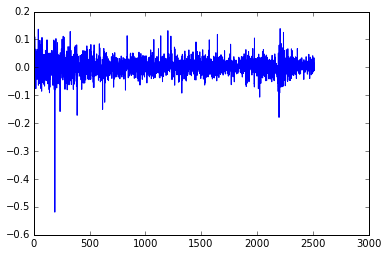

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(returns['AAPL'])

In [18]:
returns.MSFT.corr(returns.IBM)

0.49597960242323913

In [19]:
returns.MSFT.cov(returns.IBM)

0.00021595758609365014

In [20]:
# correlación de todas las parejas
returns.corr()

AAPL      GOOG       IBM      MSFT
AAPL  1.000000  0.470676  0.410011  0.424305
GOOG  0.470676  1.000000  0.390689  0.443587
IBM   0.410011  0.390689  1.000000  0.495980
MSFT  0.424305  0.443587  0.495980  1.000000

In [21]:
# covarianza de todas las parejas
returns.cov()

AAPL      GOOG       IBM      MSFT
AAPL  0.001027  0.000303  0.000252  0.000309
GOOG  0.000303  0.000580  0.000142  0.000205
IBM   0.000252  0.000142  0.000367  0.000216
MSFT  0.000309  0.000205  0.000216  0.000516

In [22]:
# valor de correlación de la serie de IBM con cada columna de returns
returns.corrwith(returns.IBM)

AAPL    0.410011
GOOG    0.390689
IBM     1.000000
MSFT    0.495980
dtype: float64

In [23]:
# Correlaciona con los índices correspondientes en el DataFrame del parámetro
returns.corrwith(volume)

AAPL   -0.057549
GOOG    0.062647
IBM    -0.007892
MSFT   -0.014245
dtype: float64

## Valores únicos, cuenta de valores y membresía

In [24]:
# Extrae valores únicos de una Series, no necesariamente ordenados
obj = Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])
unicos = obj.unique()
unicos

array(['c', 'a', 'd', 'b'], dtype=object)

In [25]:
# ordena el resultado (inplace)
unicos.sort()
unicos

array(['a', 'b', 'c', 'd'], dtype=object)

In [26]:
# frecuencia con que aparece cada valor (del más a menos frecuente)
obj.value_counts()

a    3
c    3
b    2
d    1
dtype: int64

In [27]:
# valores que son miembros de la lista dada
mascara = obj.isin(['b', 'c'])
mascara

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [28]:
obj[mascara]

0    c
5    b
6    b
7    c
8    c
dtype: object

In [29]:
# histograma de valores en columnas relacionadas
data = DataFrame({'Qu1': [1, 3, 4, 3, 4],
                  'Qu2': [2, 3, 1, 2, 3],
                  'Qu3': [1, 5, 2, 4, 4]})
data

Qu1  Qu2  Qu3
0    1    2    1
1    3    3    5
2    4    1    2
3    3    2    4
4    4    3    4

In [30]:
result = data.apply(pd.value_counts).fillna(0)
result  # cada columna del result dice cuantas veces aparece cada índice
# en los datos originales

Qu1  Qu2  Qu3
1  1.0  1.0  1.0
2  0.0  2.0  1.0
3  2.0  2.0  0.0
4  2.0  0.0  2.0
5  0.0  0.0  1.0

In [31]:
# np.nan y None (de Python) son tratados como pd.nan
string_data = Series(['aardvark', 'artichoke', np.nan, 'avocado'])
string_data

0     aardvark
1    artichoke
2          NaN
3      avocado
dtype: object

In [32]:
string_data[0] = None
string_data.isnull()

0     True
1    False
2     True
3    False
dtype: bool

#### Funciones para tratamiento de NaN
Recordar que la tilde ("~") sirve para negar una proposición.
![Funciones para tratamiento de NaN](func_para_nan.png)

In [33]:
# dropna en una Series devuelve los valores que no son nulos (np.nan, pd.NaN, Null)
from numpy import nan as NA
data = Series([1, NA, 3.5, NA, 7])
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

In [34]:
# otra forma
data[data.notnull()]

0    1.0
2    3.5
4    7.0
dtype: float64

In [35]:
# en un DataFrame, dropna borra por default renglones con al menos un NaN
data = DataFrame([[1., 6.5, 3.], [1., NA, NA],
                 [NA, NA, NA], [NA, 6.5, 3.]])
limpios = data.dropna()
data

0    1    2
0  1.0  6.5  3.0
1  1.0  NaN  NaN
2  NaN  NaN  NaN
3  NaN  6.5  3.0

In [36]:
limpios

0    1    2
0  1.0  6.5  3.0

In [37]:
# how="all" solo borra un renglón si todos sus datos son NaN
data.dropna(how='all')

0    1    2
0  1.0  6.5  3.0
1  1.0  NaN  NaN
3  NaN  6.5  3.0

In [38]:
# columnas
data[4] = NA
data

0    1    2   4
0  1.0  6.5  3.0 NaN
1  1.0  NaN  NaN NaN
2  NaN  NaN  NaN NaN
3  NaN  6.5  3.0 NaN

In [39]:
data.dropna(axis=1, how='all')

0    1    2
0  1.0  6.5  3.0
1  1.0  NaN  NaN
2  NaN  NaN  NaN
3  NaN  6.5  3.0

In [40]:
# borrando renglones que no cuenten con al menos cierta cantida de datos
df = DataFrame(np.random.randn(7, 3))
df.ix[:4, 1] = NA; df.ix[:2, 2] = NA
df

0         1         2
0  0.006743       NaN       NaN
1  0.737209       NaN       NaN
2  0.375837       NaN       NaN
3 -0.019703       NaN -0.915189
4 -1.836814       NaN -1.611611
5 -0.871713 -0.205212 -0.451600
6  0.940517 -0.538873 -0.008037

In [41]:
df.dropna(thresh=2) # deja sólo renglones que tengan al menos 2 datos

0         1         2
3 -0.019703       NaN -0.915189
4 -1.836814       NaN -1.611611
5 -0.871713 -0.205212 -0.451600
6  0.940517 -0.538873 -0.008037

In [42]:
# En vez de borrar, fillna rellena con cierto valor los huecos
df.fillna(0)  #copia

0         1         2
0  0.006743  0.000000  0.000000
1  0.737209  0.000000  0.000000
2  0.375837  0.000000  0.000000
3 -0.019703  0.000000 -0.915189
4 -1.836814  0.000000 -1.611611
5 -0.871713 -0.205212 -0.451600
6  0.940517 -0.538873 -0.008037

In [43]:
# con un dict, se pueden usar valores de relleno dependiendo de la columna
df.fillna({1: 0.5, 2: -1})

0         1         2
0  0.006743  0.500000 -1.000000
1  0.737209  0.500000 -1.000000
2  0.375837  0.500000 -1.000000
3 -0.019703  0.500000 -0.915189
4 -1.836814  0.500000 -1.611611
5 -0.871713 -0.205212 -0.451600
6  0.940517 -0.538873 -0.008037

In [44]:
# para hacer los reemplazos en el mismo DataFrame
df.fillna(0, inplace=True)
df

0         1         2
0  0.006743  0.000000  0.000000
1  0.737209  0.000000  0.000000
2  0.375837  0.000000  0.000000
3 -0.019703  0.000000 -0.915189
4 -1.836814  0.000000 -1.611611
5 -0.871713 -0.205212 -0.451600
6  0.940517 -0.538873 -0.008037

In [45]:
# usando métodos de "interpolación" con fillna
df = DataFrame(np.random.randn(6, 3))
df.ix[2:, 1] = NA; df.ix[4:, 2] = NA
df

0         1         2
0  0.138965 -0.316417 -0.366628
1  0.762687 -1.416092 -0.276769
2  1.926591       NaN -1.047122
3 -0.227099       NaN -2.089969
4  0.141169       NaN       NaN
5  1.934305       NaN       NaN

In [46]:
df.fillna(method='ffill') # rellena con el último valor encontrado

0         1         2
0  0.138965 -0.316417 -0.366628
1  0.762687 -1.416092 -0.276769
2  1.926591 -1.416092 -1.047122
3 -0.227099 -1.416092 -2.089969
4  0.141169 -1.416092 -2.089969
5  1.934305 -1.416092 -2.089969

In [47]:
df.fillna(method='ffill', limit=2) # rellena hasta dos huecos con ultimo valor

0         1         2
0  0.138965 -0.316417 -0.366628
1  0.762687 -1.416092 -0.276769
2  1.926591 -1.416092 -1.047122
3 -0.227099 -1.416092 -2.089969
4  0.141169       NaN -2.089969
5  1.934305       NaN -2.089969

In [48]:
# rellenando con otros valores (ej. la media de una Series)
data = Series([1., NA, 3.5, NA, 7])
data.fillna(data.mean())

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

## Indexado jerárquico
Índices en más de una columna (o fila)

In [49]:
data = Series(np.random.randn(10),
               index=[['a', 'a', 'a', 'b', 'b', 'b', 'c', 'c', 'd', 'd'],
                      [1, 2, 3, 1, 2, 3, 1, 2, 2, 3]])
data

a  1   -0.135445
   2   -0.928040
   3   -0.634258
b  1    0.584585
   2   -0.646987
   3   -0.598830
c  1    0.364959
   2   -0.370144
d  2    0.145894
   3   -0.898461
dtype: float64

In [50]:
data.index  # diferente al libro

MultiIndex(levels=[['a', 'b', 'c', 'd'], [1, 2, 3]],
           labels=[[0, 0, 0, 1, 1, 1, 2, 2, 3, 3], [0, 1, 2, 0, 1, 2, 0, 1, 1, 2]])

In [51]:
data['b']

1    0.584585
2   -0.646987
3   -0.598830
dtype: float64

In [52]:
data['b':'c']

b  1    0.584585
   2   -0.646987
   3   -0.598830
c  1    0.364959
   2   -0.370144
dtype: float64

In [53]:
data.ix[['b', 'd']]

b  1    0.584585
   2   -0.646987
   3   -0.598830
d  2    0.145894
   3   -0.898461
dtype: float64

In [54]:
# seleccionando desde los niveles internos
data[:, 2] # los "2" de los niveles a,b,c,d

a   -0.928040
b   -0.646987
c   -0.370144
d    0.145894
dtype: float64

In [55]:
# esta Series puede ser convertido a un DataFrame, "des-encimando" sus elementos
data.unstack()

1         2         3
a -0.135445 -0.928040 -0.634258
b  0.584585 -0.646987 -0.598830
c  0.364959 -0.370144       NaN
d       NaN  0.145894 -0.898461

In [56]:
# stack encima datos de un DataFrame
data.unstack().stack()

a  1   -0.135445
   2   -0.928040
   3   -0.634258
b  1    0.584585
   2   -0.646987
   3   -0.598830
c  1    0.364959
   2   -0.370144
d  2    0.145894
   3   -0.898461
dtype: float64

In [57]:
# Multiindice en renglones y columnas
frame = DataFrame(np.arange(12).reshape((4, 3)),
                  index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns=[['Ohio', 'Ohio', 'Colorado'],
                           ['Green', 'Red', 'Green']])
frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

In [58]:
# Los niveles de índices pueden tener nombres
frame.index.names = ['key1', 'key2']
frame.columns.names = ['state', 'color']
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [59]:
#intercambiando niveles
frame.swaplevel('key1', 'key2')

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

In [60]:
# sortlevel ordena niveles (hace que las consultas sean más rápidas)
frame.sortlevel(1) #ordena el segundo nivel (key2)

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
b    1        6   7        8
a    2        3   4        5
b    2        9  10       11

In [61]:
frame.swaplevel(0,1).sortlevel(0)  # ordena DESDE el primer nivel (key2)

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
     b        6   7        8
2    a        3   4        5
     b        9  10       11

In [62]:
# Las funciones estadísticas ya vistas se pueden manejar también por nivel
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [63]:
frame.sum(level="key2")

state  Ohio     Colorado
color Green Red    Green
key2                    
1         6   8       10
2        12  14       16

In [64]:
frame.sum(level='color', axis=1)

color      Green  Red
key1 key2            
a    1         2    1
     2         8    4
b    1        14    7
     2        20   10

In [65]:
## Usando las columnas como índices
frame = DataFrame({'a': range(7), 'b': range(7, 0, -1),
                   'c': ['one', 'one', 'one', 'two', 'two', 'two', 'two'],
                   'd': [0, 1, 2, 0, 1, 2, 3]})
frame

a  b    c  d
0  0  7  one  0
1  1  6  one  1
2  2  5  one  2
3  3  4  two  0
4  4  3  two  1
5  5  2  two  2
6  6  1  two  3

In [66]:
frame2 = frame.set_index(['c', 'd'])
frame2

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

In [67]:
# si se desea, se pueden mantener las columnas que se tomarán como índices
frame.set_index(['c', 'd'], drop=False)

a  b    c  d
c   d              
one 0  0  7  one  0
    1  1  6  one  1
    2  2  5  one  2
two 0  3  4  two  0
    1  4  3  two  1
    2  5  2  two  2
    3  6  1  two  3

In [68]:
# convierte índices a columnas (op. contraria a set_index)
frame2.reset_index()

c  d  a  b
0  one  0  0  7
1  one  1  1  6
2  one  2  2  5
3  two  0  3  4
4  two  1  4  3
5  two  2  5  2
6  two  3  6  1

## Indexados posicionales
no incluye extremo derecho

In [69]:
# aquí el índice es con enteros
ser = Series(np.arange(3.))
ser
#ser[-1]    # pero esto no se vale en pandas, pues "-1" podría 
            #  ser una etiqueta o el último índice

0    0.0
1    1.0
2    2.0
dtype: float64

In [70]:
# sin embargo, cuando se especifican etiquetas que no sean enteros,
#  no hay confusión
ser2 = Series(np.arange(3.), index=['a', 'b', 'c'])
ser2[-1]

2.0

In [71]:
# tampoco hay confusión con otros indexadores, por ejemplo, rebanadas
#  siempre serán consideradas como rebanadas de etiquetas (incluyen extremos)
ser.ix[:1]

0    0.0
1    1.0
dtype: float64

In [72]:
# Para asegurarse que siempre se usen las posiciones para indexar valores
#  usar iloc o iat
ser3 = Series(range(3), index=[-5, 1, 3])
ser3.iat[2]  # localizar valor basado en la posición (escalar)

2

In [73]:
ser3.iloc[:2] # localizar por escalar, rebanada, lujoso, booleano, función

-5    0
 1    1
dtype: int64

In [74]:
# Esto es similar para DataFrames, pero con indexados bidimensionales
df = DataFrame(np.arange(15).reshape(3,5), index=list("abc"),
               columns=list("ABCDE"))
df

A   B   C   D   E
a   0   1   2   3   4
b   5   6   7   8   9
c  10  11  12  13  14

In [75]:
df.iat[1,1]

6

In [76]:
df.iloc[:2, 1:4]

B  C  D
a  1  2  3
b  6  7  8

Nota: ya no se usan iget_value, irow, icol

## Paneles
arreglos 3D.

En general, el indexado jerárquico ayuda a evitar el uso de arreglos multidimensionales.

Se pueden generar Paneles con un dict de DataFrames o un ndarray tri-dimensional.

In [77]:
pdata = pd.Panel(np.arange(120).reshape(8,3,5), items=list("ABCDEFGH"))
pdata  # los "item" son objetos DataFrame (pueden verse como capas)

<class 'pandas.core.panel.Panel'>
Dimensions: 8 (items) x 3 (major_axis) x 5 (minor_axis)
Items axis: A to H
Major_axis axis: 0 to 2
Minor_axis axis: 0 to 4

In [78]:
pdata['A'] # 1a capa

0   1   2   3   4
0   0   1   2   3   4
1   5   6   7   8   9
2  10  11  12  13  14

In [79]:
pdata['B'] # 2a capa, etc...

0   1   2   3   4
0  15  16  17  18  19
1  20  21  22  23  24
2  25  26  27  28  29

In [80]:
pdata2 = pdata.swapaxes('items', 'minor') # especie de transpuesta
pdata2

<class 'pandas.core.panel.Panel'>
Dimensions: 5 (items) x 3 (major_axis) x 8 (minor_axis)
Items axis: 0 to 4
Major_axis axis: 0 to 2
Minor_axis axis: A to H

In [81]:
pdata2[0]

A   B   C   D   E   F    G    H
0   0  15  30  45  60  75   90  105
1   5  20  35  50  65  80   95  110
2  10  25  40  55  70  85  100  115

In [82]:
pdata2[1]

A   B   C   D   E   F    G    H
0   1  16  31  46  61  76   91  106
1   6  21  36  51  66  81   96  111
2  11  26  41  56  71  86  101  116

In [83]:
# indexado con etiquetas en 3D
pdata2.ix[:, 2, 'H']

0    115
1    116
2    117
3    118
4    119
Name: H, dtype: int64

In [84]:
pdata.ix[2,1:2,1:2]

1   2
1  36  37
2  41  42

In [85]:
# puede verse como un sólo DataFrame con columnas dadas por los items (capas)
#  y las otras dimensiones conformando un multi-indice para renglones
pdata.to_frame()

A   B   C   D   E   F    G    H
major minor                                  
0     0       0  15  30  45  60  75   90  105
      1       1  16  31  46  61  76   91  106
      2       2  17  32  47  62  77   92  107
      3       3  18  33  48  63  78   93  108
      4       4  19  34  49  64  79   94  109
1     0       5  20  35  50  65  80   95  110
      1       6  21  36  51  66  81   96  111
      2       7  22  37  52  67  82   97  112
      3       8  23  38  53  68  83   98  113
      4       9  24  39  54  69  84   99  114
2     0      10  25  40  55  70  85  100  115
      1      11  26  41  56  71  86  101  116
      2      12  27  42  57  72  87  102  117
      3      13  28  43  58  73  88  103  118
      4      14  29  44  59  74  89  104  119

In [86]:
# la operación contraria es to_panel
frame2

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

In [87]:
frame2.to_panel()

<class 'pandas.core.panel.Panel'>
Dimensions: 2 (items) x 2 (major_axis) x 4 (minor_axis)
Items axis: a to b
Major_axis axis: one to two
Minor_axis axis: 0 to 3

## Leyendo y escribiendo datos

Funciones para leer datos hacia Pandas
![Funciones para leer datos hacia Pandas](lectura_hacia_pandas.png)

Estas funciones tienen opciones para:

* dar o leer los índices
* inferir o convertir el tipo de datos a leer
* interpretar fechas y horas
* iterar en pedazos de archivos grandes
* limpieza de datos